In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [2]:
mv = pd.read_parquet("data/movies.parquet")

In [3]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          93 non-null     object
 1   description    93 non-null     object
 2   pa             85 non-null     object
 3   te_zien_tot    89 non-null     object
 4   genre          89 non-null     object
 5   land           92 non-null     object
 6   taal           93 non-null     object
 7   ondertitels    84 non-null     object
 8   speelduur      93 non-null     object
 9   regisseur      93 non-null     object
 10  distributeur   90 non-null     object
 11  min_age        93 non-null     int64 
 12  duration_min   93 non-null     int64 
 13  director_norm  93 non-null     object
 14  title_norm     93 non-null     object
 15  primary_genre  93 non-null     object
dtypes: int64(2), object(14)
memory usage: 11.8+ KB


In [39]:
# There are few popular directors 

director_film_count = mv['regisseur'].value_counts()
pd.DataFrame({'num_of_movies': director_film_count})

,num_of_movies
Wong Kar Wai,6
Michael Winterbottom,3
Luca Guadagnino,2
"Kentucker Audley, Albert Birney",1
"Benoît Delépine, Gustave Kervern",1
...,...
"Anne-Lise Koehler, Éric Serre",1
Desiree Akhavan,1
Pedro Almodóvar,1
Larisa Sadilova,1


<BarContainer object of 17 artists>

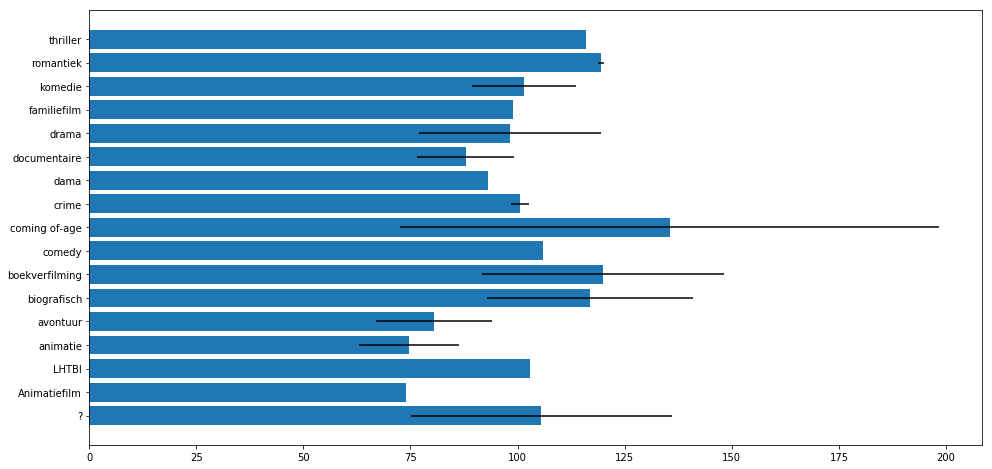

In [55]:
# duration by genre (mean,std)
fig, ax = plt.subplots(figsize=(16,8))
group_by_genre = mv.groupby('primary_genre')
duration_by_genre_mean = group_by_genre['duration_min'].mean()
duration_by_genre_std = group_by_genre['duration_min'].std()
df = pd.DataFrame({'mean':duration_by_genre_mean, 'std':duration_by_genre_std})
#duration_by_genre.plot.bar()
ax.barh(duration_by_genre_mean.index, duration_by_genre_mean, xerr=duration_by_genre_std)

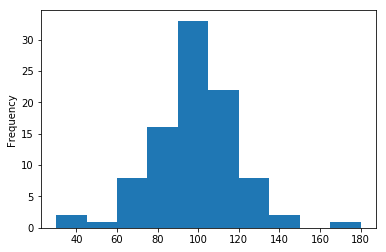

In [24]:
# distribution of duration
mv.duration_min.plot.hist()

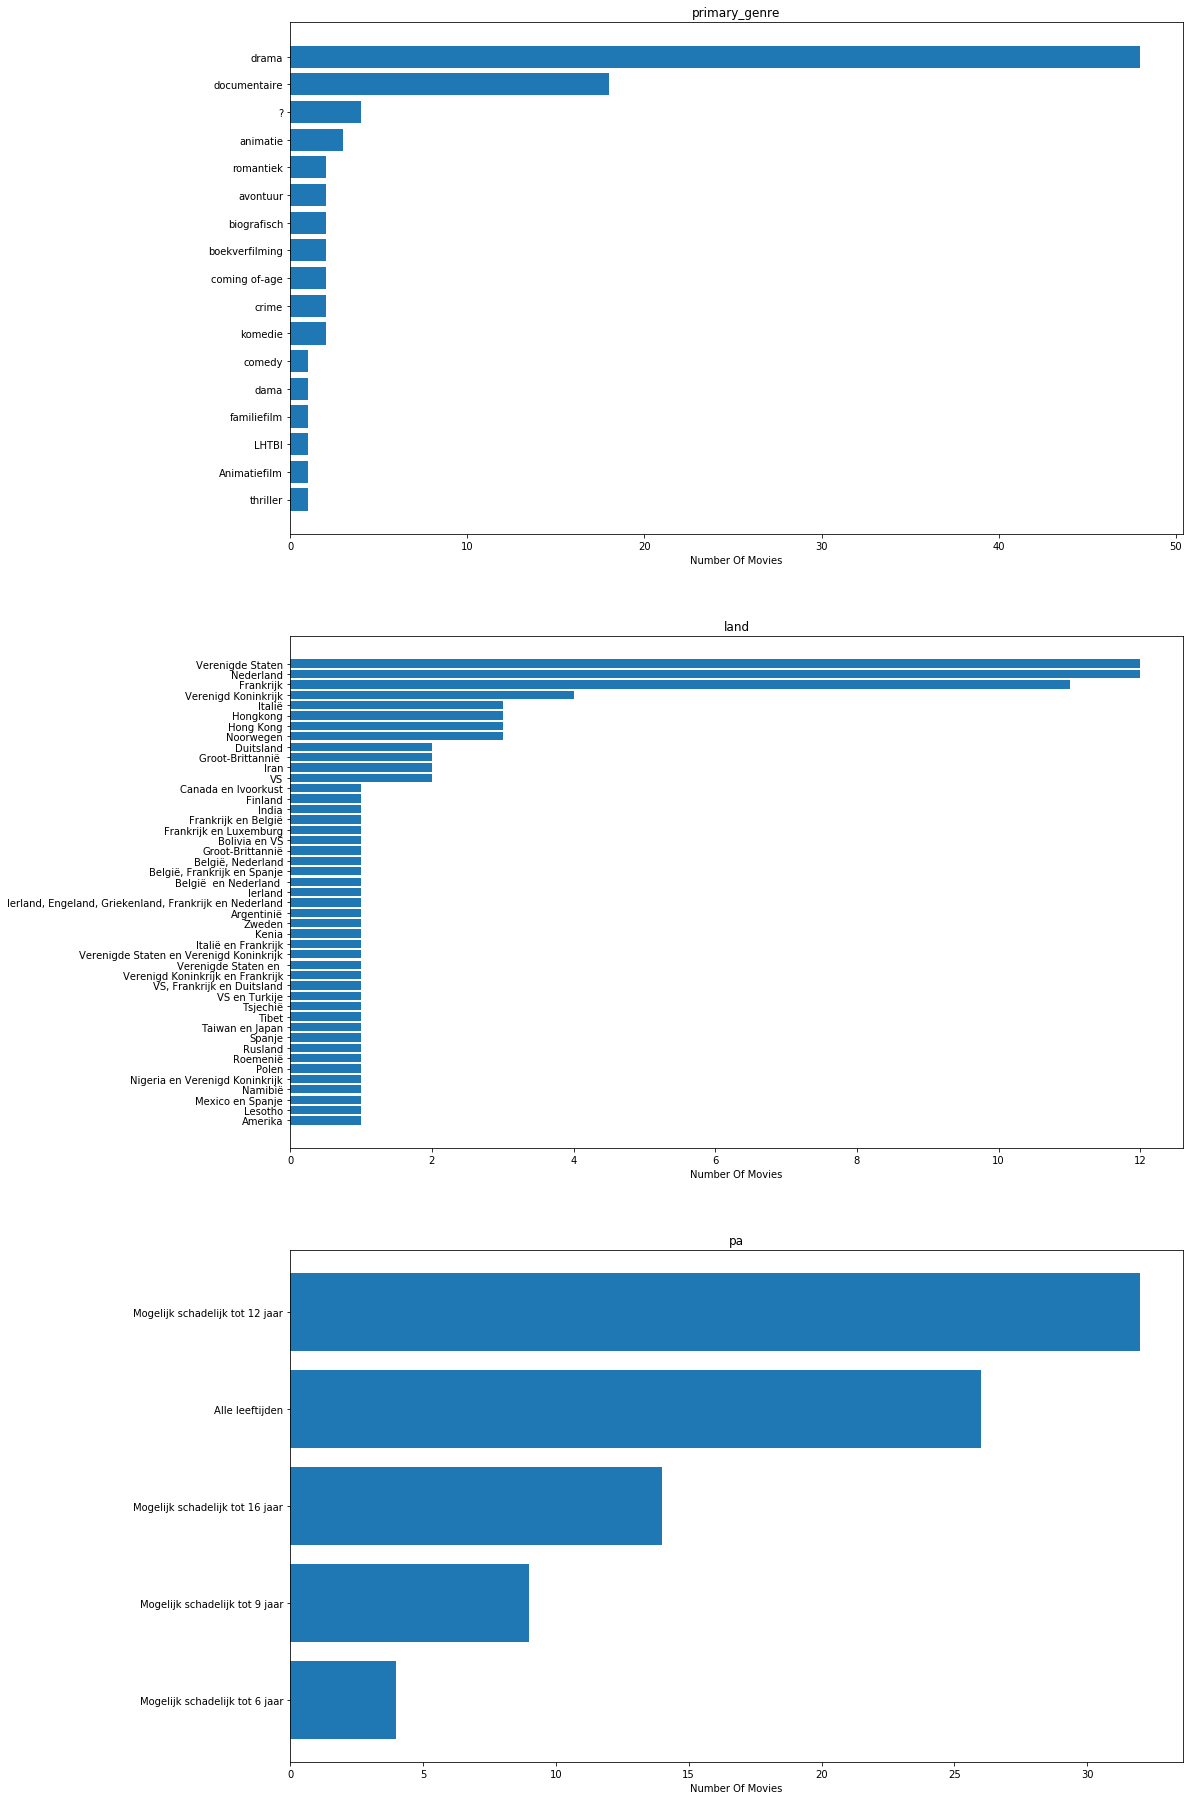

In [32]:
ana_cols = ['primary_genre', 'land', 'pa']

n_cols = 1
figure, ax = plt.subplots(len(ana_cols)//n_cols, n_cols, figsize=(16,32))
for i, col in enumerate(ana_cols):
    counts = mv.groupby(col)['title'].count().sort_values()
    #s = ax[i//n_cols, i%n_cols]
    s = ax[i]
    s.barh(counts.index, width=counts.values)
    s.set_xlabel('Number Of Movies')
    s.set_title(col)
plt.show()